# Movie lens 20m Data Set - Data Analysis and Processing
**This data set contains:**
* 20000263 ratings (1-5), 65564 tag applications across 27278 movies
* 138493 users between January 09, 1995 and March 31, 2015
* Each user has rated at least 20 movies. 
* No demographic info.

## Files
**ratings.csv**
- contains all ratings
- following format: userId,movieId,rating,timestamp

**tags.csv**
Tags applied to movies by users.
- userId,movieId,tag,timestamp

**movies.csv**
- movieId,title,genres (pipe-seperated list)
- Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western, (no genres listed)

## Data Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

### Read in data

In [16]:
rating_df= pd.read_csv("data/ratings.csv")

movie_df = pd.read_csv("data/movies.csv", encoding="latin-1")

tags = pd.read_csv("data/tags.csv")

In [18]:
print("Rating Matrix")
print(rating_df.head())

print()
print("Movie information")
print(movie_df.head())

print()
print("Tags")
print(tags.head())

Rating Matrix
   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

Movie information
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Tags
   userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  13681

In [ ]:
# One-hot encode genres
movie_df = movie_df.join(movie_df['genres'].str.get_dummies("|"))

In [31]:
movie_df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Summary Statistics
* Number of movies.
* Summary statistics of movie each genre, release dates

#### Movie Statistics 
* Number of movies
* Number of each genre (table and graph)
* Top 3 genres
* Which genres occur together the most
* Distribution of release dates 

In [32]:
# Number of movies
print("This dataset surveys:", len(movie_df), "movies.")

This dataset surveys: 27278 movies.


In [38]:
# Number of each genre
num_genres = movie_df.iloc[:, 4:].copy().sum()

print(num_genres)

Action          3520
Adventure       2329
Animation       1027
Children        1139
Comedy          8374
Crime           2939
Documentary     2471
Drama          13344
Fantasy         1412
Film-Noir        330
Horror          2611
IMAX             196
Musical         1036
Mystery         1514
Romance         4127
Sci-Fi          1743
Thriller        4178
War             1194
Western          676
dtype: int64


c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

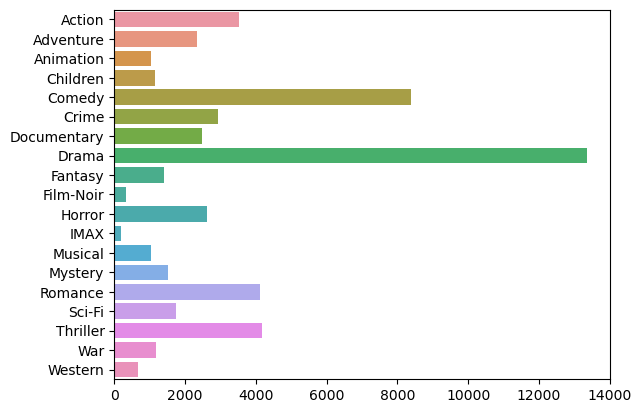

In [39]:
sns.barplot(y=num_genres.index, x=num_genres, orient='h')

In [40]:
# Top-3 genres
print("The top three genres are: ", end='')
num_genres.nlargest(3)

The top three genres are: 

Drama       13344
Comedy       8374
Thriller     4178
dtype: int64

In [43]:
# Which movies occur together the most?
# Code
    # filter for each movie genre,
    # For that genre, take the most co-occuring genre

from operator import index


genres_df = movie_df.iloc[:, 4:]

for genre in genres_df.columns[4:]:
    genre_df = genres_df[genres_df[genre] == 1].copy()
    most_coocurring = genre_df.sum().nlargest(2)
    co_genre = list(most_coocurring.index.values)[1]
    print(genre, "with", co_genre, "for", most_coocurring.iloc[1])


Comedy with Drama for 2546
Crime with Drama for 1712
Documentary with Comedy for 126
Drama with Romance for 2573
Fantasy with Adventure for 511
Film-Noir with Drama for 235
Horror with Thriller for 1073
IMAX with Action for 101
Musical with Comedy for 493
Mystery with Thriller for 795
Romance with Drama for 2573
Sci-Fi with Action for 641
Thriller with Drama for 1868
War with Drama for 894
Western with Drama for 162


In [63]:
# top 20 frequent keyword tags
tag_counter = tags.tag.str.split(expand=True).stack().value_counts()
tag_counter.nlargest(20)

comedy         7298
on             6641
a              6351
based          5592
ending         4852
book           4819
Nudity         3872
dark           3766
story          3628
sci-fi         3484
Oscar          3406
action         3210
(Best          3070
of             2949
atmospheric    2922
funny          2849
great          2829
twist          2806
movie          2784
the            2637
Name: count, dtype: int64

### Cross-Connection Analysis
* Top/lowest-k rated movies: overall, genre, gender, occupation, age.

In [45]:
# Combine data

df = movie_df.merge(rating_df, on='movieId', how='inner')

In [48]:
# Count number of reviews / movie
grouped = df[["title", "rating", "genres"]].groupby("title")["rating"]
ranking = grouped.count().to_frame()
ranking = ranking.rename(columns ={"rating": "num_reviews"})
ranking_df = movie_df.copy().merge(ranking, on="title")

# Mean rating
rating = grouped.mean().to_frame()
ranking_df = ranking_df.merge(rating, on="title")

In [51]:
ranking_df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_reviews,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,49695,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,22243,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,12735,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,2756,2.861393
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,12161,3.064592


In [55]:
# top-5 most-reviewed movies
print("top 5 most-ranked\n", ranking_df[["title", "num_reviews", "rating"]].nlargest(5, columns=["num_reviews"]), "\n",sep="")

# top-5 rating
mask1 = ranking_df["num_reviews"] >= 100
print("top 5 in ratings w/ at least 10 reviews\n", ranking_df[["title", "num_reviews", "rating"]].loc[mask1].nlargest(5, columns=["rating"]), "\n", sep="")

# least-5 in rating
print("top 5 lowest in ratings w/ at least 10 reviews\n", ranking_df[["title", "num_reviews", "rating"]].loc[mask1].nsmallest(5, columns=["rating"]), "\n", sep="")

top 5 most-ranked
                                title  num_reviews    rating
293               Pulp Fiction (1994)        67310  4.174231
352               Forrest Gump (1994)        66172  4.029000
315  Shawshank Redemption, The (1994)        63366  4.446990
588  Silence of the Lambs, The (1991)        63299  4.177057
476              Jurassic Park (1993)        59715  3.664741

top 5 in ratings w/ at least 10 reviews
                                 title  num_reviews    rating
315   Shawshank Redemption, The (1994)        63366  4.446990
845              Godfather, The (1972)        41355  4.364732
49          Usual Suspects, The (1995)        47006  4.334372
523            Schindler's List (1993)        50054  4.310175
1197    Godfather: Part II, The (1974)        27398  4.275641

top 5 lowest in ratings w/ at least 10 reviews
                                     title  num_reviews    rating
8180   SuperBabies: Baby Geniuses 2 (2004)          209  0.837321
6377           From Jus

In [57]:
# Highest rated per genre

print("Top 5 per genre (w/ at least 10 reviews)")
for genre in movie_df.columns[4:-2]:
    print(genre)
    mask = (ranking_df["num_reviews"] >= 100) & (ranking_df[genre] == 1)
    print(ranking_df[["title", "num_reviews", "rating"]].loc[mask].nlargest(5, columns=["rating"]), "\n", sep="")

Top 5 per genre (w/ at least 10 reviews)
Action
                                            title  num_reviews    rating
1938  Seven Samurai (Shichinin no samurai) (1954)        11611  4.274180
7360                      Band of Brothers (2001)         4305  4.263182
5921          City of God (Cidade de Deus) (2002)        12937  4.235410
893                     North by Northwest (1959)        15627  4.233538
2876                            Fight Club (1999)        40106  4.227123

Adventure
                                                  title  num_reviews    rating
1938        Seven Samurai (Shichinin no samurai) (1954)        11611  4.274180
5921                City of God (Cidade de Deus) (2002)        12937  4.235410
893                           North by Northwest (1959)        15627  4.233538
1175  Raiders of the Lost Ark (Indiana Jones and the...        43295  4.219009
2946                                     Yojimbo (1961)         3559  4.211717

Animation
                  